#CAPSTONE2

Name: Ali Raihan Nashrullah

Dataset: TSA Claims Database

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings("ignore")

Read Data

In [61]:
missing_values = ["n/a", "na", "-","--"]
df=pd.read_csv('tsa_claims.csv', na_values = missing_values)
display(df.head(),df.tail())

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2-Feb-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full


,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
204262,2015120427297,20-Nov-15,16-Oct-15,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other; Clothing,NaN,NaN,NaN,NaN
204263,2015123027969,17-Dec-15,2-Dec-15,NaN,NaN,NaN,Property Damage,Checked Baggage,Audio/Video; Home Decor,NaN,NaN,NaN,NaN
204264,2016010428072,22-Dec-15,20-Dec-15,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Clothing,NaN,NaN,NaN,NaN
204265,2016011328300,30-Dec-15,28-Dec-15,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,NaN,NaN,NaN,NaN
204266,2015123128015,31-Dec-15,23-Nov-15,NaN,NaN,NaN,Passenger Property Loss,Checkpoint,Personal Accessories,NaN,NaN,NaN,NaN


Cek informasi data set

In [187]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')

print('\n''informasi dataset:')
df.info()

Jumlah baris dan kolom di dataset df adalah (164718, 13)

informasi dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 164718 entries, 0 to 204181
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Claim Number   164718 non-null  object
 1   Date Received  164718 non-null  object
 2   Incident Date  164718 non-null  object
 3   Airport Code   164718 non-null  object
 4   Airport Name   164718 non-null  object
 5   Airline Name   164718 non-null  object
 6   Claim Type     164718 non-null  object
 7   Claim Site     164718 non-null  object
 8   Item           164718 non-null  object
 9   Claim Amount   164718 non-null  object
 10  Status         164718 non-null  object
 11  Close Amount   164718 non-null  object
 12  Disposition    164718 non-null  object
dtypes: object(13)
memory usage: 17.6+ MB


Cek deskripsi data

In [63]:
display(df.describe(), df.describe(include='object'))

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
count,204267,204004,202084,195302,195302,165646,196072,203251,195878,187472,191510,135315,131359
unique,204258,4007,26807,464,484,317,10,5,4703,36116,14,17162,3
top,2013121110011,5-Dec-03,12/27/2004 0:00,LAX,John F. Kennedy International,American Airlines,Passenger Property Loss,Checked Baggage,Other,$0.00,Denied,$0.00,Deny
freq,2,682,144,9596,9232,17553,117868,159753,36908,28445,68339,71546,68382


,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
count,204267,204004,202084,195302,195302,165646,196072,203251,195878,187472,191510,135315,131359
unique,204258,4007,26807,464,484,317,10,5,4703,36116,14,17162,3
top,2013121110011,5-Dec-03,12/27/2004 0:00,LAX,John F. Kennedy International,American Airlines,Passenger Property Loss,Checked Baggage,Other,$0.00,Denied,$0.00,Deny
freq,2,682,144,9596,9232,17553,117868,159753,36908,28445,68339,71546,68382


Cek data unik

In [64]:
pd.set_option('display.max_colwidth', -1)
# data unik di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

Column Name  Number of Unique  \
0   Claim Number   204258             
1   Date Received  4007               
2   Incident Date  26807              
3   Airport Code   464                
4   Airport Name   484                
5   Airline Name   317                
6   Claim Type     10                 
7   Claim Site     5                  
8   Item           4703               
9   Claim Amount   36116              
10  Status         14                 
11  Close Amount   17162              
12  Disposition    3                  

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [65]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

Claim Number     0.000000 
Date Received    0.128753 
Incident Date    1.068699 
Airport Code     4.388864 
Airport Name     4.388864 
Airline Name     18.907117
Claim Type       4.011906 
Claim Site       0.497388 
Item             4.106880 
Claim Amount     8.222082 
Status           6.245257 
Close Amount     33.755820
Disposition      35.692501
dtype: float64

Cek Sebaran Missing Value

<AxesSubplot: >

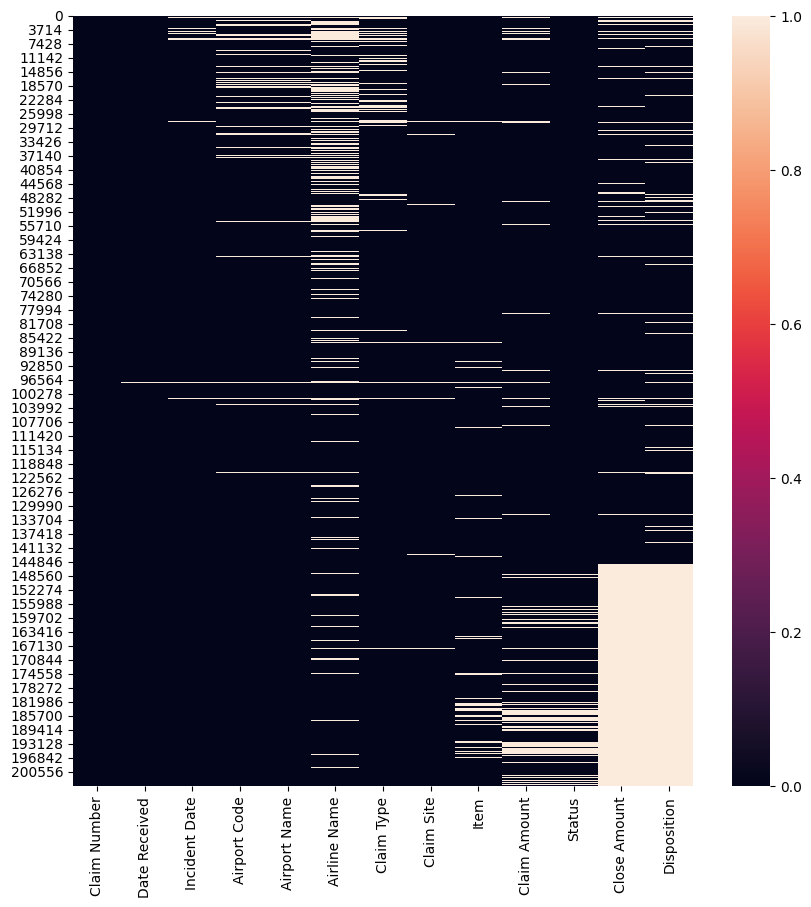

In [66]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df[['Claim Number','Date Received','Incident Date','Airport Code','Airport Name','Airline Name','Claim Type','Claim Site', 'Item', 'Claim Amount', 'Status', 'Close Amount', 'Disposition']].isna())

* Dari total 13 Kolom yang ada didalam data set, terdapat 11 kolom memiliki data kosong yang berisikan NaN, kolom-kolom tersebut adalah Incident Date, Airport Code, Airport Nama, Airline Name, Claim Type, Claim Site, Item, Claim Amount, Status, Close Amount, Disposition
* Berdasarkan data proporsi missing value terdapat 3 kolom (Airline Name, Close Amount dan Disposition) yang memiliki angka presentase missing value diatas 10%, oleh sebab itu perlu dilakukan pengecekan lebih dalam terkait missing value dari tiap-tiap kolom sehingga missing value dapat diisi dan Selain ketiga kolom diatas, terdapat beberapa kolom yang memiliki proporsi nilai missing value dibawah 10%, yaitu kolom Date Received, Incident Date, Airport Code, Airport Name, Claim Type, Claim Site, Item, Claim Amount, dan Status.

* Berdasarkan peta persebaran missing value, persebaran missing value antara kolom Close Amount dan Disposition terlihat berkaitan.





Pengecekan kolom Disposition dengan Kolom Closed Amount untuk melihat hubungan kedua kolom tersebut

In [67]:
display(df[df['Disposition']== 'Approve in Full'].head(),
df[df['Disposition']== 'Settle'].head(),
df[df['Disposition']== 'Deny'].head())

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full
6,2007050124750,30-Apr-02,4/26/2007 0:00,PHL,Philadelphia International Airport,USAir,Passenger Property Loss,Checked Baggage,Professional Equipment,$106.52,Approved,$106.52,Approve in Full
7,12772,20-Jun-02,5/9/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,NaN,Checkpoint,Clothing - Shoes; belts; accessories; etc.,$75.00,Approved,$75.00,Approve in Full


,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
1,0202417M,2-Feb-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
5,2005032479636,18-Feb-02,2/17/2005 0:00,CAK,Akron-Canton Regional,Air Tran Airlines(do not use),Passenger Property Loss,Checked Baggage,Other,$459.01,Settled,$227.00,Settle
21,16410,24-Jul-02,7/10/2002 0:00,SDF,Louisville International,Delta Air Lines,Passenger Property Loss,Checkpoint,Luggage (all types including footlockers),$600.00,Settled,$337.40,Settle
23,2004092763985,8-Aug-02,7/26/2002 0:00,NaN,NaN,NaN,NaN,Other,Other,$160.00,Settled,$149.08,Settle


,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
9,2004102965797,25-Jun-02,5/4/2002 0:00,ATL,Hartsfield-Jackson Atlanta International Airport,NaN,Passenger Property Loss,Checkpoint,Jewelry - Fine,$4;457.29,Denied,NaN,Deny
14,0616771L,12-Jul-02,NaN,NaN,NaN,NaN,NaN,Other,Clothing - Shoes; belts; accessories; etc.,NaN,Denied,NaN,Deny
15,15242,12-Jul-02,5/31/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),$200.00,Denied,$0.00,Deny
16,15324,12-Jul-02,6/12/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,NaN,NaN,Other,Luggage (all types including footlockers),$50.00,Denied,$0.00,Deny
17,15361,15-Jul-02,3/11/2002 0:00,NaN,NaN,NaN,Personal Injury,Motor Vehicle,Luggage (all types including footlockers),$110;000.00,Denied,$0.00,Deny


Pada tiga tabel diatas dapat dilihat bahwa terdapat relasi antara kolom Disposition dengan Kolom Claim Amount dan Close Amount.
* Data Disposition bernilai "Approve in Full", apabila nilai dari Claim Amount sama dengan nilai Close Amount.
* Data Disposition bernilai "Settle", apabila nilai dari Claim Amount tidak sama dengan nilai Close Amount tetapi tidak kosong ataupun angka 0.
* Data Disposition bernilai "Deny", apabila nilai dari Claim Amount tidak sama dengan nilai Close Amount dan bernilai kosong ataupun angka 0.

Secara logika, dapat disimpulkan bahwa nilai Claim Amount dan Close amount diperlukan untuk menentukan Disposition.
Sehingga wajar apabila peneliti berkesimpulan nilai yang kosong pada closed amount menyebabkan nilai yang kosong pada kolom Disposition.

Atas kesimpulan diatas, peneliti melakukan pengisian missing value yang ada pada Close Amount dengan nilai 0 dan ada kolom Disposition diisi dengan kategori baru yaitu 'Not Available'.

Sebelumnya pengisian angka 0 pada missing value di kolom Close Amount dikarenakan untuk mempermudah perhitungan pada tahapan selanjutnya.

In [68]:
df['Close Amount'] = df['Close Amount'].fillna(value=0)
df.loc[(df['Disposition'].isna())&(df['Close Amount']==0),['Disposition']]='Not Available'

Cek jumlah dan proporsi missing value setelah dilakukan pengisian data

In [69]:
df[['Close Amount', 'Disposition']].isna().sum()

Close Amount    0   
Disposition     5429
dtype: int64

In [70]:
df.isna().sum()/df.shape[0]*100

Claim Number     0.000000 
Date Received    0.128753 
Incident Date    1.068699 
Airport Code     4.388864 
Airport Name     4.388864 
Airline Name     18.907117
Claim Type       4.011906 
Claim Site       0.497388 
Item             4.106880 
Claim Amount     8.222082 
Status           6.245257 
Close Amount     0.000000 
Disposition      2.657796 
dtype: float64

Berdasarkan pengecekan jumlah data kosong pada kolom Close Amount dan kolom Disposition, masih terdapat data kosong sebanyak 5429 pada kolom Disposition. Tetapi apabila dilihat dari hasil pengecekan proporsi missing value, angka persentase dari Disposition telah turun menjadi 2,7%. Dikarenakan nilai presentase proporsi kolom Disposition rendah (dibawah 10%), maka peneliti akan menghapus sisa missing value pada kolom Disposition. 

In [71]:
df.dropna(subset=['Disposition'],inplace=True)

In [72]:
df.isna().sum()/df.shape[0]*100

Claim Number     0.000000 
Date Received    0.091532 
Incident Date    0.972148 
Airport Code     4.258240 
Airport Name     4.258240 
Airline Name     18.679025
Claim Type       3.896137 
Claim Site       0.441565 
Item             3.940394 
Claim Amount     8.154377 
Status           6.415776 
Close Amount     0.000000 
Disposition      0.000000 
dtype: float64

Kolom selanjutnya yang memiliki nilai presentase proporsi yang tinggi (diatas 10%) adalah kolom Airline Name.
Pada kolom ini, sulit untuk dapat mengisi nilai berdasarkan kolom lain. Hal ini dikarenakan nilai dari kolom Airline Name sangatlah acak, beragam dan tidak tergantung dari nilai yang ada di kolom lain. 
Oleh sebab itu peneliti akan mengisi data kosong di kolom Airline Name dengan nilai Other.

In [73]:
df['Airline Name']=df['Airline Name'].fillna('Other')

In [74]:
df.isna().sum()/df.shape[0]*100

Claim Number     0.000000
Date Received    0.091532
Incident Date    0.972148
Airport Code     4.258240
Airport Name     4.258240
Airline Name     0.000000
Claim Type       3.896137
Claim Site       0.441565
Item             3.940394
Claim Amount     8.154377
Status           6.415776
Close Amount     0.000000
Disposition      0.000000
dtype: float64

Setelah pengisian missing value pada kolom Airline Name, dapat dilihat pada data proporsi missing value dari tiap-tiap kolom yang bernilai tinggi (diatas 10%).
Maka peneliti dapat melakukan penghapusan data missing value yang tersisa, guna mengatasi anomali missing value yang tersisa.

In [75]:
df.dropna(subset=['Date Received', 'Incident Date', 'Airport Code', 'Airport Name', 'Claim Type', 'Claim Site', 'Item', 'Claim Amount', 'Status'],inplace=True)

In [76]:
df.isna().sum()/df.shape[0]*100

Claim Number     0.0
Date Received    0.0
Incident Date    0.0
Airport Code     0.0
Airport Name     0.0
Airline Name     0.0
Claim Type       0.0
Claim Site       0.0
Item             0.0
Claim Amount     0.0
Status           0.0
Close Amount     0.0
Disposition      0.0
dtype: float64

In [77]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(3).values)])

dfDesc = pd.DataFrame(columns=['Kolom', 'Tipe Data', 'Data Kosong', 'Data Unique', 'Contoh Data Unique'],
                     data=listItem)
print(df.shape)
dfDesc

(164718, 13)


,Kolom,Tipe Data,Data Kosong,Data Unique,Contoh Data Unique
0,Claim Number,object,0,164718,"[2005033080529, 2006010498739, 2005062487150]"
1,Date Received,object,0,3860,"[15-Jun-07, 7-May-04, 12-Oct-07]"
2,Incident Date,object,0,22140,"[10/7/2011 8:30, 8/13/2010 0:00, 8/5/2010 14:30]"
3,Airport Code,object,0,451,"[HKY, PFN, JHM]"
4,Airport Name,object,0,470,"[Brainerd; MN, Kearney Municipal Airport , Houston - George Bush Intercontinental Airport]"
5,Airline Name,object,0,304,"[Swiss Air, Wiggins Airways, British Midland Airways Ltd]"
6,Claim Type,object,0,9,"[Employee Loss (MPCECA), Wrongful Death, Passenger Theft]"
7,Claim Site,object,0,5,"[Motor Vehicle, Bus Station, Checkpoint]"
8,Item,object,0,4400,"[Cameras; Hunting & Fishing Items; Medical/Science; Other; Tools & Home Improvement Supplies, Audio/Video; Baggage/Cases/Purses; Other; Other, Clothing - Shoes; belts; accessories; etc.; Jewelry - Costume]"
9,Claim Amount,object,0,33289,"[$460.10 , $199.60 , $9.85 ]"


Berdasarkan pengecekan data diatas dapat terlihat bahwa:
* Jumlah data sudah berkurang yang bermula 204267 baris menjadi 164718 baris 
* Tidak terdapat missing value yang tersisa

## RUMUSAN MASALAH

* Dimana sajakah Top 10 Airport dengan jumlah permintaan claim terbanyak?
* Siapakah Top 10 Airline dengan jumlah permintaan claim terbanyak?
* Apakah terdapat korelasi antara Airport dan Jumlah Claim?
* Apakah terdapat korelasi antara Airline dan Jumlah Claim?


### Insight 1
Top 10 Airport dengan jumlah permintaan claim terbanyak

In [186]:
AirportClaim = (df.groupby('Airport Name')['Claim Number'].count()).sort_values(ascending=False).head(10)
Top10AirportClaim = (pd.DataFrame(AirportClaim))
Top10AirportClaim

,Claim Number
Airport Name,
John F. Kennedy International,7522
Los Angeles International Airport,6345
Chicago O'Hare International Airport,5944
Newark International Airport,5854
Orlando International Airport,5460
Miami International Airport,5244
Hartsfield-Jackson Atlanta International Airport,4896
Seattle-Tacoma International,4612
McCarran International,4416


# BARPLOT

Terdapat perbedaan dengan yang 

Text(0, 0.5, 'Count of Claim Number')

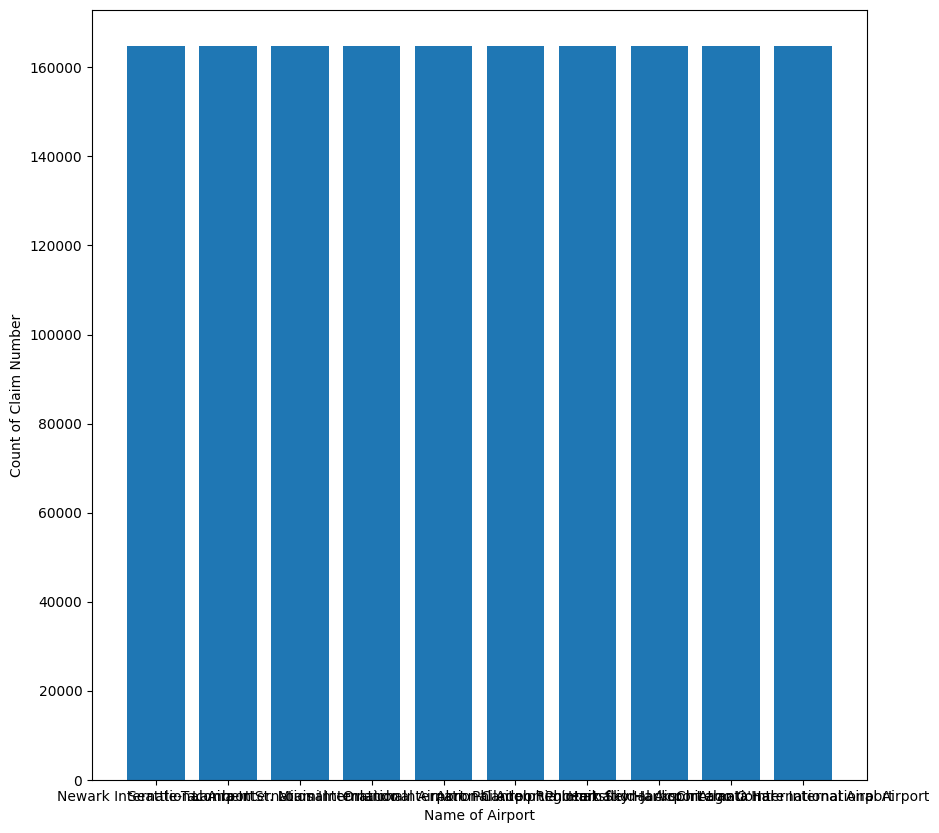

In [158]:
x = df['Airport Name'].head(10)
y = df['Claim Number'].count()

plt.figure(figsize=(10,10))
plt.bar(x,y)
plt.xlabel('Name of Airport')
plt.ylabel('Count of Claim Number')

### Insight 2
Top 10 Airline dengan jumlah permintaan claim terbanyak

In [130]:
AirlineClaim = (df.groupby(['Airline Name'])['Claim Number'].count()).sort_values(ascending=False).head(10)
Top10AirlineClaim = (pd.DataFrame(AirlineClaim))
Top10AirlineClaim

,Claim Number
Airline Name,
Other,26422
American Airlines,15119
Delta Air Lines,14826
UAL,11972
Southwest Airlines,11370
Continental Airlines,8597
USAir,8367
Northwest Airlines,7970
Delta Air Lines,6366


Text(0, 0.5, 'Count of Claim Number')

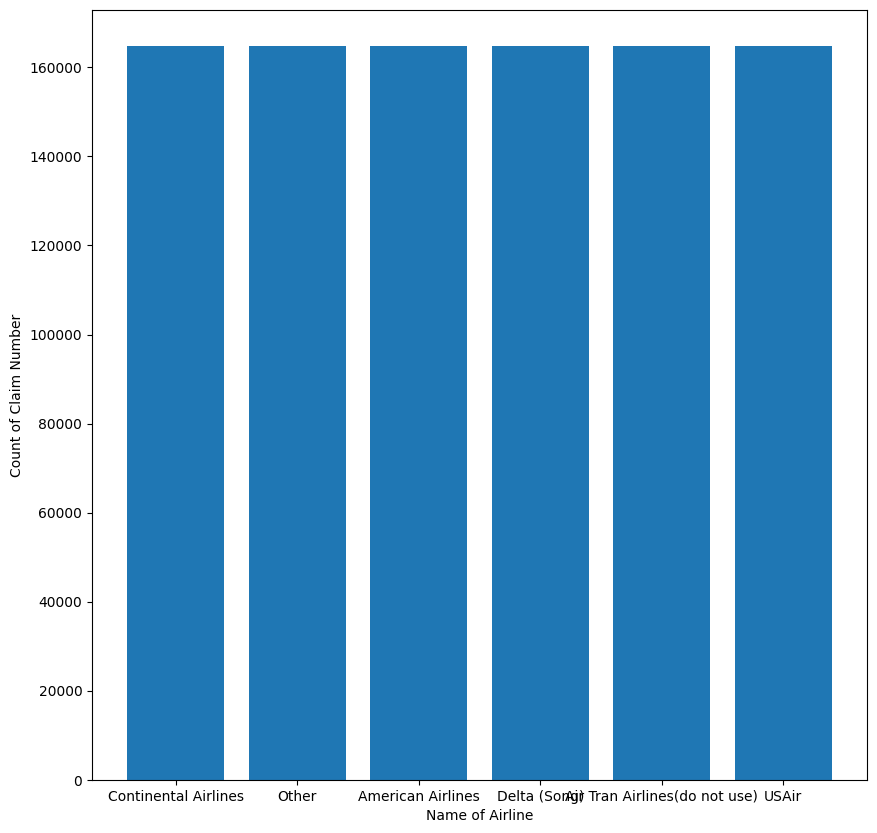

In [164]:
x = df['Airline Name'].head(10)
y = df['Claim Number'].count()

plt.figure(figsize=(10,10))
plt.bar(x,y)
plt.xlabel('Name of Airline')
plt.ylabel('Count of Claim Number')

### Insight 3
Top 10 Item yang paling sering di Claim

In [163]:
#jumlah Close Amount dari tiap-tiap Airline Name
ItemClaim = (df.groupby(['Item'])['Claim Number'].count()).sort_values(ascending=False).head(10)
TopItemClaim = (pd.DataFrame(ItemClaim))
TopItemClaim

,Claim Number
Item,
Other,29990
Luggage (all types including footlockers),16144
Clothing - Shoes; belts; accessories; etc.,12405
Locks,8532
Jewelry - Fine,8049
Cameras - Digital,7896
Computer - Laptop,7632
Baggage/Cases/Purses,5189
Computer & Accessories,3921


Text(0, 0.5, 'Count of Claim Number')

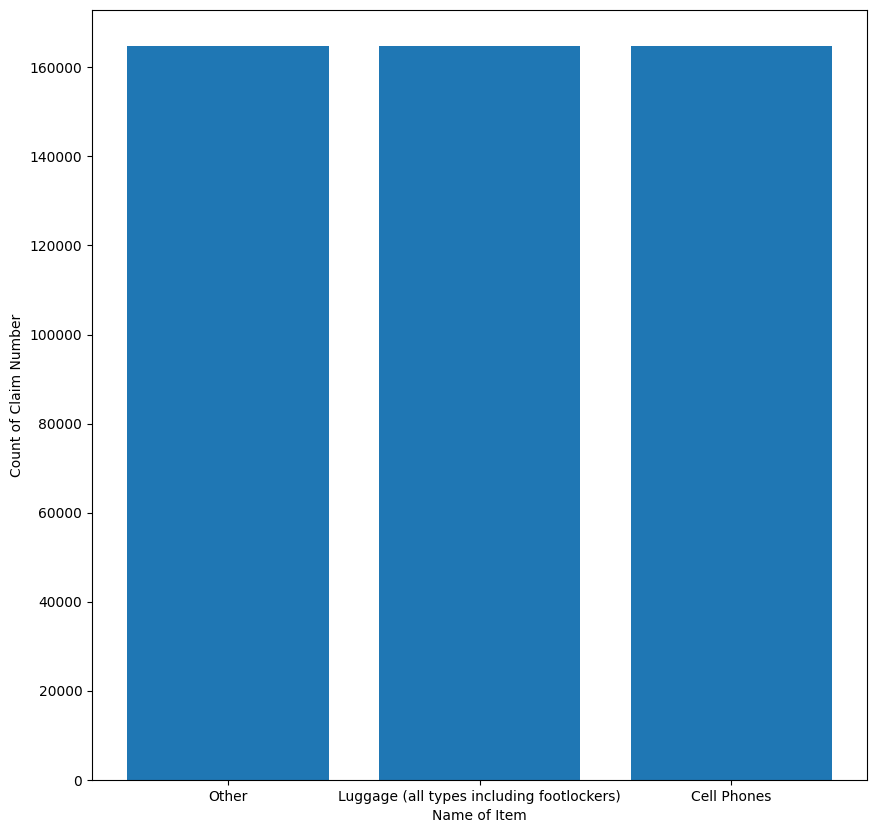

In [167]:
x = df['Item'].head(3)
y = df['Claim Number'].count()

plt.figure(figsize=(10,10))
plt.bar(x,y)
plt.xlabel('Name of Item')
plt.ylabel('Count of Claim Number')

# Uji Korelasi antara Airport Name & Banyaknya Claim Number dan Airline & banyaknya  Claim Number menggunakan Chi Square Test.

### Uji Korelasi Airport Name & Banyaknya Claim Number
H0 = Kedua kolom tidak berkorelasi

H1 = Kedua kolom berkorelasi

Jika P-value > 0.05 = H0 diterima
Jika P-value < 0.05 = H0 ditolak

In [172]:
CtAirportClaim = pd.crosstab(index=df['Airport Name'], columns= df['Claim Number'].count())
CtAirportClaim

col_0,164718
Airport Name,
Albert J Ellis; Jacksonville,9
Aberdeen Regional Airport,26
Abilene Regional,41
Abraham Lincoln Capital Airport; Springfield,21
Adak Mitchell Field Airport,1
...,...
Yeager; Charleston,68
Yellowstone,5
Yellowstone Regional,9


In [181]:
ChiSqResult = chi2_contingency(CtAirportClaim)
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 1.0


Berdasarkan hasil uji korelasi, didapatkan hasil bahwa kolom Airport Name tidak memiliki korelasi dengan kolom banyaknya Number Claim

### Uji Korelasi Airline Name & Banyaknya Claim Number
H0 = Kedua kolom tidak berkorelasi

H1 = Kedua kolom berkorelasi

Jika P-value > 0.05 = H0 diterima
Jika P-value < 0.05 = H0 ditolak

In [180]:
CtAirlineClaim = pd.crosstab(index=df['Airline Name'], columns= df['Claim Number'].count())
CtAirlineClaim

col_0,164718
Airline Name,
ATA Aerocondor,296
Aer Lingus,90
Aero California,3
Aero Flot,38
Aero Lineas Mexicanas J S S A De C V,2
...,...
Westjet Airlines Ltd,143
Wiggins Airways,1
XL Airways,2


In [182]:
ChiSqResult = chi2_contingency(CtAirportClaim)
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 1.0


In [ ]:
Berdasarkan hasil uji korelasi, didapatkan hasil bahwa kolom Airline Name tidak memiliki korelasi dengan kolom banyaknya Number Claim

# Kesimpulan dan Rekomendasi 

Dari analisis yang telah dilakukan, peneliti mendapatkan hasil bahwa banyaknya claim (Count of Claim Number) tidak dipengaruhi oleh tempat (Airport Name) dan maskapai penerbangan (Airline Name) yang di kunjungi dan digunakan oleh Claimant (orang yang mengajukan claim). Hal ini didapatkan dari hasil uji korelasi yang menyatakan memang tidak ada korelasi antara Airline Name & Claim Number maupun Airport Name & Claim Number.

Rekomendasi

berdasarkan insight yang telah didapatkan terkait top 10 Airport dan Airline dengan jumlah permintaan claim terbanyak, penelitian merekomendasikan untuk dapat dilakukan penelitian lebih mendalam kepada 10 Airport dan Airline dimaksud untuk mengetahui penyebab banyaknya nilai permintaan claim.


Save data frame to CSV for Data Visualization using Tableu

In [185]:
df.to_csv("D:\Ali Raihan Nashrullah\Dokumen Penting\Purwadhika\JC - Data Science & Machine Learning\Module 2\Capstone 2\courses.csv")